## 필수과제 3
- 서베이 데이터 가지고 간단한 시각화 및 전처리
- 정규표현식을 가지고 한글만 남기고 모두 다 삭제해 주시고
- 만족도에 따른 분석도, 시계열에 따른 분석도 가능하다.
- 두 가지 컬럼을 가지고 텍스트를 분석해 보기
- 시각화 + 분석 내용을 요약

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
survey = pd.read_csv('survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [5]:
# 정규표현식을 가지고 한글만 남기고 모두 다 삭제
survey['comment'] = survey['comment'].str.replace('[^ ㄱ-ㅣ가-힣+]',"", regex=True)  #regex

In [6]:
survey['comment']

0                역앞에 젊은이들이 모여있다역
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3       어린이집에 바로 입원할 수 있다대기아동 없음
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85              역앞에 주차장이 적다 불편하다
Name: comment, Length: 86, dtype: object

In [7]:
survey['len'] = survey['comment'].str.len() # 전체 리뷰에 대한 길이를 만들 수 있다.
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다역,1,15.0
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21.0
2,2019-02-18,육아 지원이 좋다,5,9.0
3,2019-04-09,어린이집에 바로 입원할 수 있다대기아동 없음,4,24.0
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11.0
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22.0
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26.0
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15.0
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14.0


# 분석시도 : 상관관계
- 결과 : comment의 길이와 satisfaction과의 상관관계는 없다.

In [8]:
survey.corr(method= 'pearson')

<ipython-input-8-6ec605cc73f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey.corr(method= 'pearson')


,satisfaction,len
satisfaction,1.000000,-0.115757
len,-0.115757,1.000000


In [9]:
survey.corr(method= 'kendall')

<ipython-input-9-bf56ef1eedfc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey.corr(method= 'kendall')


,satisfaction,len
satisfaction,1.000000,-0.085822
len,-0.085822,1.000000


# 시계열 분석 : 주별 satisfactoin 평균 비교

In [12]:
new_df = survey.set_index('datetime') # datetime 칼럼을 인덱스로 설정
new_df.index = pd.to_datetime(new_df.index) # 인덱스를 datetime index로 변경
new_df.info() # 변경 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 2019-03-11 to 2019-04-02
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   comment       84 non-null     object 
 1   satisfaction  86 non-null     int64  
 2   len           84 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [26]:
serial_df= new_df.resample('W').mean()
serial_df

<ipython-input-26-0cf6bbff16a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  serial_df= new_df.resample('W').mean()


,satisfaction,len
datetime,,
2019-01-06,2.000000,9.500000
2019-01-13,2.142857,21.857143
2019-01-20,1.000000,30.000000
2019-01-27,3.333333,17.000000
2019-02-03,3.800000,19.600000
2019-02-10,2.000000,19.000000
2019-02-17,3.200000,19.000000
2019-02-24,3.250000,14.500000
2019-03-03,2.800000,22.000000


<Axes: xlabel='datetime'>

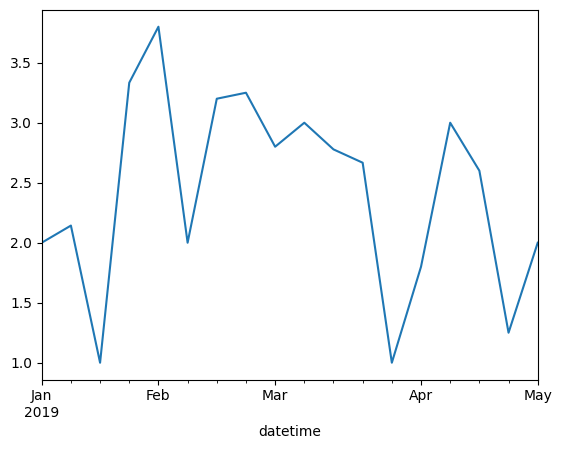

In [27]:
serial_df['satisfaction'].plot()


- 주별 satisfaction 평균을 시각화하였다.
- 1월 3째주, 3월 4째주에 satisfaction이 제일 최저였고, 2월 1째주, 4월 1째주가 최고였다.
- 최저점 다음에 최고점이 바로 있는 것이 흥미로운 결과였고, 아마 최저점으로 피드백을 받고 어떠한 처리가 이루어져 만족도가 급상승한 것으로 보인다.